<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Data-loading-and-cleaning" data-toc-modified-id="Data-loading-and-cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data loading and cleaning</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clustering</a></span></li><li><span><a href="#Single-models-tuning" data-toc-modified-id="Single-models-tuning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Single models tuning</a></span></li><li><span><a href="#Ensemble-models-tuning" data-toc-modified-id="Ensemble-models-tuning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ensemble models tuning</a></span></li><li><span><a href="#Pipelines" data-toc-modified-id="Pipelines-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Pipelines</a></span></li><li><span><a href="#Monte-Carlo-simulations" data-toc-modified-id="Monte-Carlo-simulations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Monte-Carlo simulations</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Business-recommendations" data-toc-modified-id="Business-recommendations-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Business recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Future Work</a></span></li><li><span><a href="#Addendum:-city-maps" data-toc-modified-id="Addendum:-city-maps-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Addendum: city maps</a></span></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: Nuran Kairakbayev
* Student pace: self paced
* Scheduled project review date/time: Dec 18, 2019 10:15 AM CST
* Instructor name: Jeff Herman
* Blog post URL: https://nurankz.github.io/benefits_of_pca


## Data loading and cleaning

In [1]:
import time
START = time.time()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(37)

main steps:
- loading dataset
- deleting id-type columns
- reformating data types
- dealing with missing data
- identifying and dealing with incorrect data
- bining categorical data
- parsing Cuisine Style

In [2]:
df_raw = pd.read_csv('TA_restaurants_curated.csv')

In [3]:
# 2.1. Data overview

In [4]:
display(df_raw.head())
display(df_raw.info())
display(df_raw.describe())

# Check id-type cols
for col in df_raw.columns:
    print(col)
    print('total number of records',len(df_raw[col]))
    print('number of unique:',len(df_raw[col].unique()))
    print('number of non-nan records',len(df_raw[col]) - df_raw[col].isna().sum())

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 11 columns):
Unnamed: 0           125527 non-null int64
Name                 125527 non-null object
City                 125527 non-null object
Cuisine Style        94176 non-null object
Ranking              115876 non-null float64
Rating               115897 non-null float64
Price Range          77672 non-null object
Number of Reviews    108183 non-null float64
Reviews              115911 non-null object
URL_TA               125527 non-null object
ID_TA                125527 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 10.5+ MB


None

,Unnamed: 0,Ranking,Rating,Number of Reviews
count,125527.000000,115876.000000,115897.000000,108183.000000
mean,3974.686131,3657.463979,3.987441,125.184983
std,4057.687698,3706.255301,0.678814,310.833311
min,0.000000,1.000000,-1.000000,2.000000
25%,1042.000000,965.000000,3.500000,9.000000
50%,2445.000000,2256.000000,4.000000,32.000000
75%,5626.000000,5237.000000,4.500000,114.000000
max,18211.000000,16444.000000,5.000000,16478.000000


Unnamed: 0
total number of records 125527
number of unique: 18212
number of non-nan records 125527
Name
total number of records 125527
number of unique: 111927
number of non-nan records 125527
City
total number of records 125527
number of unique: 31
number of non-nan records 125527
Cuisine Style
total number of records 125527
number of unique: 20972
number of non-nan records 94176
Ranking
total number of records 125527
number of unique: 16443
number of non-nan records 115876
Rating
total number of records 125527
number of unique: 11
number of non-nan records 115897
Price Range
total number of records 125527
number of unique: 4
number of non-nan records 77672
Number of Reviews
total number of records 125527
number of unique: 2080
number of non-nan records 108183
Reviews
total number of records 125527
number of unique: 96697
number of non-nan records 115911
URL_TA
total number of records 125527
number of unique: 125326
number of non-nan records 125527
ID_TA
total number of records 125527

 let's drop the following cols: 
 - ID_TA, URL_TA, Unnamed: 0, Name, Reviews (which could be usefull for NLP analysis)

In [5]:
cols_2_drop = ['Unnamed: 0', 'Name', 'Reviews', 'URL_TA', 'ID_TA']
try:
    df_raw = df_raw.drop(columns=cols_2_drop, axis=1)
except Exception:
    pass

 From analysis above the dataset has missing rows for Price Range, Ranking, Rating and Number of Reviews  
 The following solutions are proposed for it:
 
 
 - Price Range (~38% of data are missed) - delete all rows for missing data
   - This variable - is Target and categorical variable, so replacing it with some kind of Mod could bias dataset
   - In case of dropping NaNs the dataset is still contains ~78K-rows which seems solid for future modelling
 
 
 - Rating and Number of Reviews - replace NaNs with median value
   - In Rating - (-1) possibly incorrect samples identified
   - Replace them with (1)
 
 
 - Ranking - replace NaNs with mod value, since the data has ordered categorical nature
 
 
 - Data formats: finally, let's convert Float to Int for Int-type columns 

In [6]:
# 2.2. Dealing with missing and incorrect data

In [7]:
# 2.2.1. Price Range
missing_index = df_raw['Price Range'].isna() * df_raw.index
missing_index = np.array(list(set(missing_index) - set([0])))

try:
    df_raw = df_raw.drop(index=missing_index, axis=0)
except Exception:
    pass

# 2.2.2. Other NANS
cols_to_replace_nans = ['Ranking', 'Rating', 'Number of Reviews']
for col in cols_to_replace_nans:
    median = df_raw[col].median()
    moda = df_raw[col].value_counts().idxmax()
    if col == 'Rating':
        df_raw[col] = df_raw[col].fillna(moda)
    else:
        df_raw[col] = df_raw[col].fillna(median)
        
# 2.2.3. Incorrect values
new_ranking = [i if i>0 else 1 for i in df_raw.Rating]
df_raw.Rating = new_ranking

# 2.2.4. Optimize data formats
cols_to_reformat = ['Ranking', 'Number of Reviews']
for col in cols_to_reformat:
    df_raw[col] = df_raw[col].astype(int)

Next step is related to Cuisine Style column which contains lists of cuisine styles for each sample in STR-format  
General idea here is to convert it to dummy-type set (matrix) for each row

In [8]:
# 2.3. Parsing Cuisine Style

In [9]:
cuisine_style_set = set()
for row in df_raw['Cuisine Style']:
    raw_list = [i for i in row[1:-1].split(',')]
    for style in raw_list:
        style = style.strip("' ")
        cuisine_style_set.add(style)


for style in cuisine_style_set:
    style_bool = [1 if i.find(style) != -1 else 0 for i in df_raw['Cuisine Style']]
    label = f'cuisine_{style}'
    df_raw[label] = style_bool
    df_raw[label] = df_raw[label].astype(int)

df_raw = df_raw.drop(columns='Cuisine Style', axis=1)

Now, let's convert cities to dummy-matrix 

In [10]:
# 2.4. Dealing with categorical variables

In [11]:
y = df_raw['Price Range']
df_raw = df_raw.drop(columns=['Price Range'], axis=1)
X = pd.get_dummies(df_raw, prefix='city_')

df = pd.concat([X,y], axis=1)

In [12]:
# 2.5. Final check

In [13]:
display(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77672 entries, 0 to 125526
Columns: 160 entries, Ranking to Price Range
dtypes: float64(1), int32(127), object(1), uint8(31)
memory usage: 41.7+ MB


None

,Ranking,Rating,Number of Reviews,cuisine_Gastropub,cuisine_Mongolian,cuisine_Italian,cuisine_Israeli,cuisine_Mediterranean,cuisine_Indonesian,cuisine_Contemporary,...,city__Munich,city__Oporto,city__Oslo,city__Paris,city__Prague,city__Rome,city__Stockholm,city__Vienna,city__Warsaw,city__Zurich
count,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,...,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000,77672.000000
mean,2978.156685,4.022164,171.186399,0.016892,0.000335,0.199364,0.002549,0.223414,0.001815,0.018720,...,0.022544,0.013827,0.010029,0.123339,0.034427,0.060524,0.018218,0.027384,0.017484,0.014432
std,3353.830013,0.557984,354.840559,0.128866,0.018293,0.399525,0.050425,0.416536,0.042568,0.135534,...,0.148444,0.116775,0.099644,0.328828,0.182324,0.238456,0.133738,0.163202,0.131066,0.119266
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,687.000000,3.500000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1699.000000,4.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3975.000000,4.500000,173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16443.000000,5.000000,16478.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Ranking,Rating,Number of Reviews,cuisine_Gastropub,cuisine_Mongolian,cuisine_Italian,cuisine_Israeli,cuisine_Mediterranean,cuisine_Indonesian,cuisine_Contemporary,...,city__Oporto,city__Oslo,city__Paris,city__Prague,city__Rome,city__Stockholm,city__Vienna,city__Warsaw,city__Zurich,Price Range
0,1,5.0,136,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,$$ - $$$
1,2,4.5,812,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,$$$$
2,3,4.5,567,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,$$$$
3,4,5.0,564,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,$$$$
4,5,4.5,316,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,$$$$


In [14]:
DC_TIME = time.time()

## EDA

main steps:
- Visual analysis for Target
- Visual analysis for Predictors
- Possible clusters in Predict Space
- Correlation analysis

In [15]:
# 3.1. Data preparation for EDA

In [16]:
# Changing STR-records to INT for Target
price_range_cont = []
target_dict = dict()

for value in df['Price Range']:
    if value == '$$ - $$$':
        price_range_cont.append(1)
        target_dict[1] = '$$ - $$$'
    elif value == '$':
        price_range_cont.append(0)
        target_dict[0] = '$'
    else:
        price_range_cont.append(2)
        target_dict[2] = '$$$$'

df['Price Range'] = price_range_cont

y = df['Price Range']
X = df.drop(columns='Price Range', axis=1)

In [17]:
# 3.2. Target exploration analysis

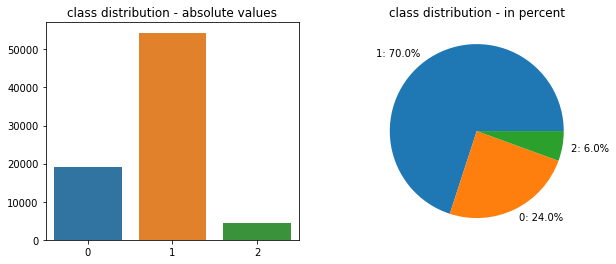

class values


1    54360
0    19005
2     4307
Name: Price Range, dtype: int64

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].set_title('class distribution - absolute values')
ax[1].set_title('class distribution - in percent')
sns.barplot(list(y.value_counts().index), list(y.value_counts()), ax=ax[0])
labels_percent = [f'{i}: {round(j/len(y),2)*100}%' for i,j in zip(y.value_counts().index, y.value_counts())]
ax[1].pie(list(y.value_counts()/len(y)), labels=labels_percent)
plt.show()

print('class values')
display(y.value_counts())

So, the target is balanced with moderate level, and I will not resample data (e.g. by Smote) in next steps

In [19]:
# 3.3. Numerical variables analysis

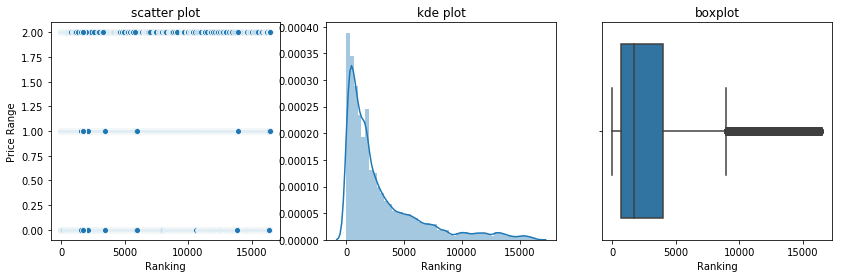

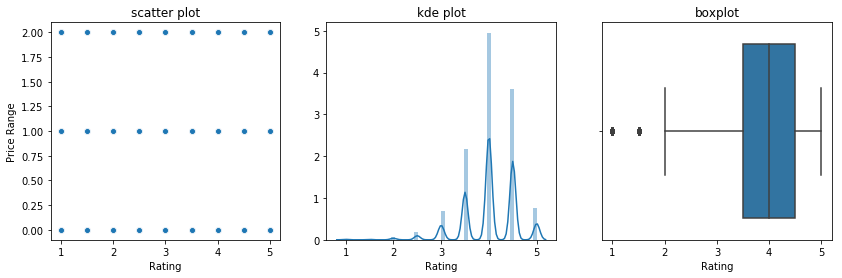

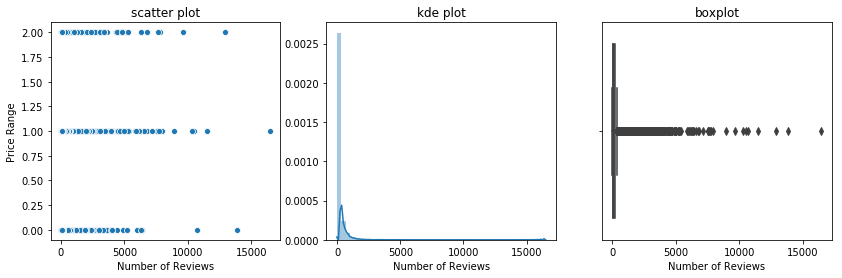

In [20]:
predictor_cols = ['Ranking', 'Rating', 'Number of Reviews']

for col in predictor_cols:
    fig, ax = plt.subplots(1,3,figsize=(14,4))
    ax[0].set_title('scatter plot')
    ax[1].set_title('kde plot')
    ax[2].set_title('boxplot')
    sns.scatterplot(X[col],y,ax=ax[0])
    sns.distplot(X[col],ax = ax[1])
    sns.boxplot(X[col],ax=ax[2])

Issues from visual analysis:
- there are some interval-based structure in Rankings per class, which could be useful in Decision Tree model ans SVM
- but Number of Reviews and Rating are not clear in that aspect
- all 3 predictors are not normally distributed and might be normalized in next steps
- all 3 predictors have some few outliers, but because of non-OLS methods let's remain such samples in X

In [21]:
# 3.4. Possible clusters in X

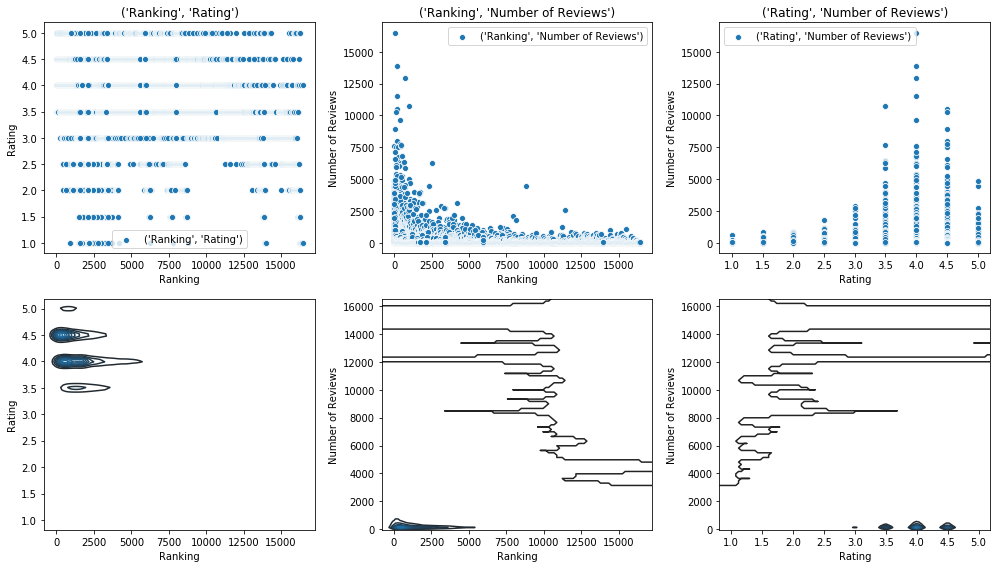

In [22]:
# Here I will test only 3 variables - 'Ranking', 'Rating', 'Number of Reviews' - without dummy-vars
# attention!: this cell can take up to 5-10 min

from itertools import combinations

pairs = list(combinations(predictor_cols,2))

fig, ax = plt.subplots(2,3,figsize=(14,8))
for idx, pair in enumerate(pairs):
    ax[0, idx].set_title(pair)
    sns.scatterplot(X[pair[0]],X[pair[1]],ax=ax[0,idx],label=pair)
    sns.kdeplot(data=X[pair[0]], data2=X[pair[1]],ax=ax[1, idx])
    plt.tight_layout();

Issues:
- visually, it is hard to define some clear and circle-type clusters here except Ranking-Rating
- on the other hand, it might be some dependency between Ranking-Number of Reviews (negative) and Rating-Number of Reviews
- and this is only 2D-space analysis, so separate Cluster analysis will be applied in Preprocessing Stage
- on next steps correlation analysis will be applied to understand hidden dependency in more clear way

In [23]:
# 3.5. Correlation analysis

,Ranking,Rating,Number of Reviews
Ranking,1.000000,-0.400245,-0.206199
Rating,-0.400245,1.000000,0.022379
Number of Reviews,-0.206199,0.022379,1.000000


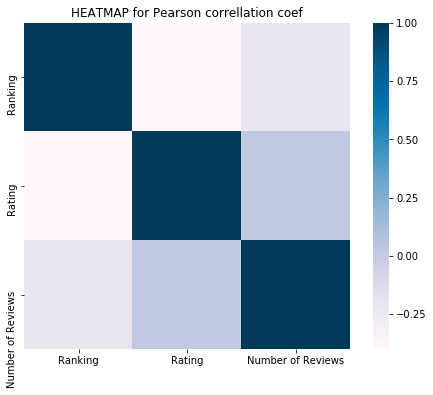

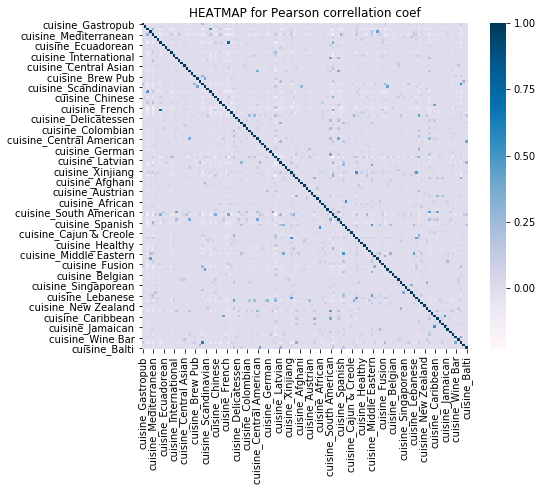

In [24]:
# 3.5.1. Heatmap function
def plot_corr_map(corr_matrix):
    "plot given correlation matrix in heatmap style"
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes()
    ax.set_title('HEATMAP for Pearson correllation coef')
    sns.heatmap(corr_matrix, square=True,ax=ax,cmap='PuBu');

# 3.5.2. Corr only for numerical variables
corr_matrix = df[predictor_cols].corr()
display(corr_matrix)
plot_corr_map(corr_matrix)

# 3.5.3. Corr only for cuisine styles
cuisine_predictors = [i for i in df.columns if i.startswith('cuisine_') ]
corr_matrix = df[cuisine_predictors].corr()
plot_corr_map(corr_matrix)

# obviously, city-predictors are uncorellated, because it is impossible 
# to have a single restaurant in 2 or more cities at the same time (no quantum effect:))

Issues from correlation analysis:
- in general, there is no strong corellation between numerical variables (max corr = 40%)
- the same picture is for cuisine styles except a few examples, such as Medditareat-Korean
- PCA-analysis in next Stage will provide a better understanding of this

In [25]:
EDA_TIME = time.time()

## PCA

In [26]:
# 4.1. Train-test-split and scaling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=X_test.columns)

display(X_train_scaled.describe())
display(X_test_scaled.describe())

,Ranking,Rating,Number of Reviews,cuisine_Gastropub,cuisine_Mongolian,cuisine_Italian,cuisine_Israeli,cuisine_Mediterranean,cuisine_Indonesian,cuisine_Contemporary,...,city__Munich,city__Oporto,city__Oslo,city__Paris,city__Prague,city__Rome,city__Stockholm,city__Vienna,city__Warsaw,city__Zurich
count,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,...,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000
mean,0.181208,0.755349,0.010252,0.016319,0.000322,0.199382,0.002607,0.222927,0.001802,0.018701,...,0.022869,0.013696,0.009785,0.123292,0.034086,0.060914,0.018411,0.027246,0.017220,0.014661
std,0.204201,0.139592,0.021938,0.126699,0.017938,0.399539,0.050994,0.416213,0.042418,0.135467,...,0.149486,0.116225,0.098434,0.328775,0.181452,0.239174,0.134433,0.162801,0.130091,0.120193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041844,0.625000,0.001517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.103272,0.750000,0.004006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.241881,0.875000,0.010257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Ranking,Rating,Number of Reviews,cuisine_Gastropub,cuisine_Mongolian,cuisine_Italian,cuisine_Israeli,cuisine_Mediterranean,cuisine_Indonesian,cuisine_Contemporary,...,city__Munich,city__Oporto,city__Oslo,city__Paris,city__Prague,city__Rome,city__Stockholm,city__Vienna,city__Warsaw,city__Zurich
count,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,...,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000
mean,0.180520,0.756308,0.010336,0.019182,0.000386,0.199292,0.002317,0.225362,0.001867,0.018796,...,0.021242,0.014355,0.011007,0.123528,0.035790,0.058964,0.017444,0.027937,0.018539,0.013518
std,0.203096,0.139116,0.019850,0.137170,0.019649,0.399481,0.048085,0.417834,0.043167,0.135809,...,0.144196,0.118952,0.104341,0.329052,0.185773,0.235564,0.130925,0.164797,0.134894,0.115482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041357,0.625000,0.001457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.103272,0.750000,0.004006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.241029,0.875000,0.010561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.999027,1.000000,0.398883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# 4.2. PCA - finding optimal number of principal components

In [29]:
from sklearn.decomposition import PCA
break_even = [0.8, 0.9, 0.95, 0.975, 0.99]

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
var_vector = np.cumsum(pca.explained_variance_ratio_)

for level in break_even:
    temp_list = []
    for n in var_vector:
        if n<=level: temp_list.append(n)
    print(f'required number of components for {level*100}% of total VAR is {len(temp_list)}')  

required number of components for 80.0% of total VAR is 36
required number of components for 90.0% of total VAR is 56
required number of components for 95.0% of total VAR is 72
required number of components for 97.5% of total VAR is 87
required number of components for 99.0% of total VAR is 102


- So, Features Matrix is not highly correlated (as we saw in Correlation Analysis)
- We can slightly  reduce X (from 159 to 87 variables) with saving 97.5% of information 

In [30]:
# 4.3. PCA - Data preprocessing

In [31]:
pca_chosen = PCA(n_components=87)
X_train_pca = pca_chosen.fit_transform(X_train_scaled)
X_test_pca = pca_chosen.transform(X_test_scaled)


pc_names = []
for pc in range(X_train_pca.shape[1]):
    pc_names.append("PC_"+str(pc))

    
X_train_pca = pd.DataFrame(data = X_train_pca, columns=pc_names)
X_test_pca = pd.DataFrame(data = X_test_pca, columns=pc_names)

# now, let's scale data again for further steps (clustering)
scaler = MinMaxScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
X_train_pca = pd.DataFrame(data = X_train_pca, columns=pc_names)
X_test_pca = pd.DataFrame(data = X_test_pca, columns=pc_names)

print('X_train')
display(X_train_pca.describe())
print('X_test')
display(X_test_pca.describe())

X_train


,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_77,PC_78,PC_79,PC_80,PC_81,PC_82,PC_83,PC_84,PC_85,PC_86
count,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,...,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000,62137.000000
mean,0.363555,0.431610,0.463666,0.427452,0.495412,0.365007,0.474175,0.475880,0.390411,0.492136,...,0.481039,0.369462,0.461498,0.494204,0.473132,0.257133,0.424278,0.376607,0.485921,0.413575
std,0.218836,0.177801,0.173924,0.153262,0.156818,0.149249,0.147491,0.119350,0.111659,0.117429,...,0.052944,0.057494,0.054837,0.059678,0.054185,0.044961,0.057171,0.044593,0.045710,0.048563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.168364,0.290804,0.341998,0.345456,0.417886,0.263076,0.387114,0.391619,0.315089,0.429840,...,0.473665,0.353767,0.454665,0.486822,0.463609,0.244684,0.410695,0.366952,0.479460,0.406381
50%,0.282672,0.430220,0.460924,0.399921,0.489533,0.338934,0.464989,0.468890,0.398235,0.493594,...,0.482745,0.366505,0.461616,0.499390,0.477450,0.255500,0.421598,0.373838,0.487055,0.414249
75%,0.522670,0.550316,0.556941,0.492024,0.540433,0.449353,0.539552,0.552612,0.456697,0.554010,...,0.493868,0.380247,0.467461,0.511847,0.489971,0.266103,0.431198,0.380833,0.494072,0.420450
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


X_test


,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_77,PC_78,PC_79,PC_80,PC_81,PC_82,PC_83,PC_84,PC_85,PC_86
count,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,...,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000,15535.000000
mean,0.365466,0.430419,0.462502,0.427375,0.495333,0.365596,0.473567,0.476934,0.390041,0.491411,...,0.480673,0.369844,0.462466,0.493520,0.473163,0.257261,0.424092,0.376741,0.486582,0.413262
std,0.219601,0.178031,0.175744,0.152621,0.156833,0.149483,0.146826,0.119440,0.111726,0.116167,...,0.054515,0.059820,0.055910,0.061490,0.055925,0.045974,0.058171,0.043984,0.046783,0.049697
min,0.016963,0.032778,0.002541,0.027796,-0.010729,0.023964,0.014046,0.030602,0.008203,0.069512,...,0.071923,-0.002540,0.139514,0.016931,0.031481,0.015846,0.068672,0.013710,0.083481,-0.001204
25%,0.169115,0.288037,0.341155,0.346604,0.417064,0.263301,0.387104,0.391575,0.315056,0.429340,...,0.473655,0.353776,0.454897,0.486654,0.463891,0.244798,0.410502,0.366943,0.479430,0.406374
50%,0.283855,0.428542,0.456599,0.399700,0.488973,0.339190,0.463856,0.470486,0.397292,0.493152,...,0.482887,0.366521,0.461706,0.499417,0.477457,0.255455,0.421522,0.373882,0.486904,0.414286
75%,0.527506,0.548877,0.556704,0.490827,0.538601,0.449104,0.539554,0.552634,0.456069,0.552800,...,0.493885,0.380391,0.467377,0.511919,0.490124,0.266022,0.431124,0.380944,0.494198,0.420579
max,0.997502,0.979859,0.998876,1.008979,0.986646,1.019363,1.031214,0.947100,0.905193,0.970173,...,0.947242,0.965008,1.006087,0.985372,0.998523,0.705189,1.085333,0.944404,0.997375,0.948512


In [32]:
PCA_TIME = time.time()

## Clustering

- In this Stage I will try to identify hidden clusters in X and create syntetic variable if such clusters exist.  
- I will test X on the following types of models:
  - Non-hierarchical clustering: KMeans++
  - DBSCAN
- For finding optimal hyper-params the following metrics will be used:
  - calinski_harabaz_score
  - silhouette_score
- All analysis will be used on PCA-scaled TRAIN dataset

In [33]:
# 4.1. KMeans++

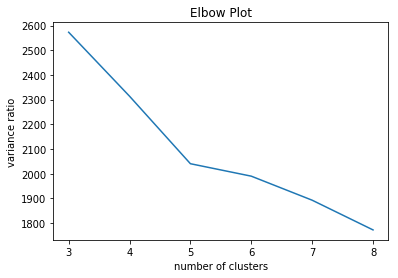

Silhouette Score for 3 clusters is 0.04122


In [34]:
# attention: this cell takes up to 5 min
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score, silhouette_score

n_cluster_list, calinski_metric_list = [], []

for n_cluster in range(3,9):
    n_cluster_list.append(n_cluster)
    k_means = KMeans(n_clusters=n_cluster, random_state=37, init='k-means++', n_jobs=-1)
    k_means.fit(X_train_pca)
    calinski_metric_list.append(calinski_harabaz_score(X_train_pca, k_means.labels_))
    
plt.plot(n_cluster_list, calinski_metric_list)
plt.xlabel('number of clusters')
plt.ylabel('variance ratio')
plt.title('Elbow Plot')
plt.show()

k_means_optimal = KMeans(n_clusters=3, random_state=37, init='k-means++', n_jobs=-1)
k_means_optimal.fit(X_train_pca)
silhouette_avg = silhouette_score(X_train_pca, k_means.labels_)
print(f'Silhouette Score for 3 clusters is {round(silhouette_avg,5)}')

- It is clear from plot above than optimal number of cluster is 3
- However, silhouette_score close to zero (<0.09), which means that there are not clear borders between clusters
- HAC is also works with spherical types of clusters, so as alternative DBSAN method is approached

In [35]:
# 4.2. DBSCAN

In [36]:
# attention: this cell can take up to 30 minutes
from sklearn.cluster import DBSCAN
eps_list = [0.05, 0.1, 0.2, 0.5]
min_samples_list = [5, 50, 500]
grid = []
for eps in eps_list:
    for min_sample in min_samples_list:
        grid.append((eps, min_sample))

for param in grid:
    dbscan = DBSCAN(eps=param[0], min_samples=param[1], n_jobs=-1)
    labels = dbscan.fit_predict(X_train_pca)
    print(f'for eps={param[0]}, min_sample={param[1]}:')
    print(50*'.')
    try:
        print(f'calinski_harabaz_score: {calinski_harabaz_score(X_train_pca, labels)}')
    except Exception:
        print('calinski_harabaz_score: N/A')
    try:
        print(f'silhouette_score: {silhouette_score(X_train_pca, labels)}')
    except Exception:
        print('silhouette_score: N/A')     
    print(50*'-')

for eps=0.05, min_sample=5:
..................................................
calinski_harabaz_score: 13.947981159380067
silhouette_score: -0.13334612717997427
--------------------------------------------------
for eps=0.05, min_sample=50:
..................................................
calinski_harabaz_score: 65.74175644408153
silhouette_score: -0.2542355904135819
--------------------------------------------------
for eps=0.05, min_sample=500:
..................................................
calinski_harabaz_score: N/A
silhouette_score: N/A
--------------------------------------------------
for eps=0.1, min_sample=5:
..................................................
calinski_harabaz_score: 25.064462087417688
silhouette_score: 0.14277494609710623
--------------------------------------------------
for eps=0.1, min_sample=50:
..................................................
calinski_harabaz_score: 104.66700372509376
silhouette_score: -0.1869470865414867
-------------------------

- As it shown above, for all considered combinations of DBSCAN hyperparams silhouette score is weak (<0.2)
- Based on that, we can conclude, that there is not clarified cluster structure

In [37]:
CLUSTER_TIME = time.time()

## Single models tuning

- In this stage I will run several models with searching optimal hyperparams


- The following ML algorythms (models) will be used here:
  - K-Nearest Neighbors
  - Decision Tree
  - Support Vector Machine
  - Logistic Regression
  - Multinomial Bayes Classifier
- Ensemble methods such as Random Forest and Ada-boost will be used in next Stage


- Also, it is important to say, that here I will use k-fold validation (inside of train dataset) for metric measurements (accuracy score)


- Because of different specifics and time to run, I will run the models in separate cells and without pipeline


- I will save model sets for each ML-algorithm to manually created class (`Single_Model`) which is 
  - a decorator-like class with grid_search methods
  - takes as inputs ml-model instance (`model_instance`), datasets (`X`,`y`), `cv` and ``param_grid`
    - also can work with XG-boost model
    - if param_grid = {}, then run a model with default params
  - automatically fit given data (`_fit_model()`)
  - has showing result method (`show_grid_results`)
  - can return best model (`best_model`), best params on grid search (`best_param`) and best score (`best_score`)

In [38]:
# 6.1. import all model classes, including ensemble methods

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost

In [40]:
# 6.2. creating general class for a single grid_search set of single_models

In [41]:
class Single_Model:
    '''
    decorator class for sklearn ML-models with grid-search and auto-fit given data
    '''
    
    def __init__(self, model_instance, X, y, cv, param_grid={}):
        self.model_instance = model_instance
        self.X = X
        self.y = y
        self.param_grid = param_grid
        self.cv = cv
        self.model = self._fit_model()
    
    def _fit_model(self):
        self.model = GridSearchCV(estimator=self.model_instance,
                                  param_grid=self.param_grid, cv=self.cv)
        self.model.fit(self.X, self.y)
        return self.model
    
    def best_model(self):
        return self.model.best_estimator_
    
    def show_grid_results(self):
        print('average results on validations subsets (if not mentioned):')
        print(70*'-')
        print(f'best params: {self.best_params()}')
        print(f'best score: {self.model.best_score_}')
        self.test_scores = self.model.cv_results_['mean_test_score']
        self.train_scores = self.model.cv_results_['mean_train_score']
        print(f'worst score: {self.test_scores.min()}')
        print(f'train subsets score range: {self.train_scores.min()} - {self.train_scores.max()}')
    
    def best_params(self):
        if self.param_grid == {}:
            self._best_model = self.best_model()
            return self._best_model.get_params()
        return self.model.best_estimator_.get_params()
    
    def best_score(self):
        return self.model.best_score_      

In [42]:
# 6.3. K-Nearest Neighbors

In [43]:
# here and for other models I shows optimized subsets for hyperparams space
# A lot of other combinations have been tested but not showed here due to long time 

# attention!: this cell can take time up to 30m!

knn = KNeighborsClassifier(n_jobs=-1)
knn_grid = {
    "n_neighbors": [8, 15, 50 ,100]
}

knn_gridmodel = Single_Model(knn, X_train_pca, y_train, cv=4, param_grid=knn_grid)
knn_default = Single_Model(knn, X_train_pca, y_train, cv=4, param_grid={})

In [44]:
knn_best_model = knn_gridmodel.best_model()
knn_default_model = knn_default.best_model() 

print('best model on grid search')
knn_gridmodel.show_grid_results()
print(70*'_')
print('default model on grid search')
knn_default.show_grid_results()
print(70*'_')

best model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 50, 'p': 2, 'weights': 'uniform'}
best score: 0.7378212659124194
worst score: 0.7224359077522249
train subsets score range: 0.7373867329038353 - 0.7751312829420767
______________________________________________________________________
default model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
best score: 0.7148076025556431
worst score: 0.7148076025556431
train subsets score range: 0.7946365800179103 - 0.7946365800179103
_________________________________

Issues:
- KNN with default params (n_neighbors = 5) provide 0.71 score
- KNN gives stable low-variance, but moderate accuracy results in range (0.72 - 0.74) despite of the fact that n_neighbours were taken in relatively wide range (from 8 to 100)

In [45]:
# 6.4. Decision Tree

In [46]:
# attention!: this cell can take time up to 20 min!

dt = DecisionTreeClassifier(random_state=37)

dt_default = Single_Model(dt, X_train_pca, y_train, cv=4, param_grid={})

dt_grid = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [5,10, 15],
    "min_samples_split": [80, 100, 120],
    "max_leaf_nodes": [40, 50, 60]
    }

dt_gridmodel = Single_Model(dt, X_train_pca, y_train, cv=4, param_grid=dt_grid)

In [47]:
dt_best_model = dt_gridmodel.best_model() 
dt_default_model = dt_default.best_model() 

print('default model on grid search')
dt_default.show_grid_results()
print(70*'_')
print('best model on grid search')
dt_gridmodel.show_grid_results()
print(70*'_')

default model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 37, 'splitter': 'best'}
best score: 0.6415179361732944
worst score: 0.6415179361732944
train subsets score range: 0.9969690597884655 - 0.9969690597884655
______________________________________________________________________
best model on grid search
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 60, 'min_impurity_decrease': 0.0, 'min_impurity_spli

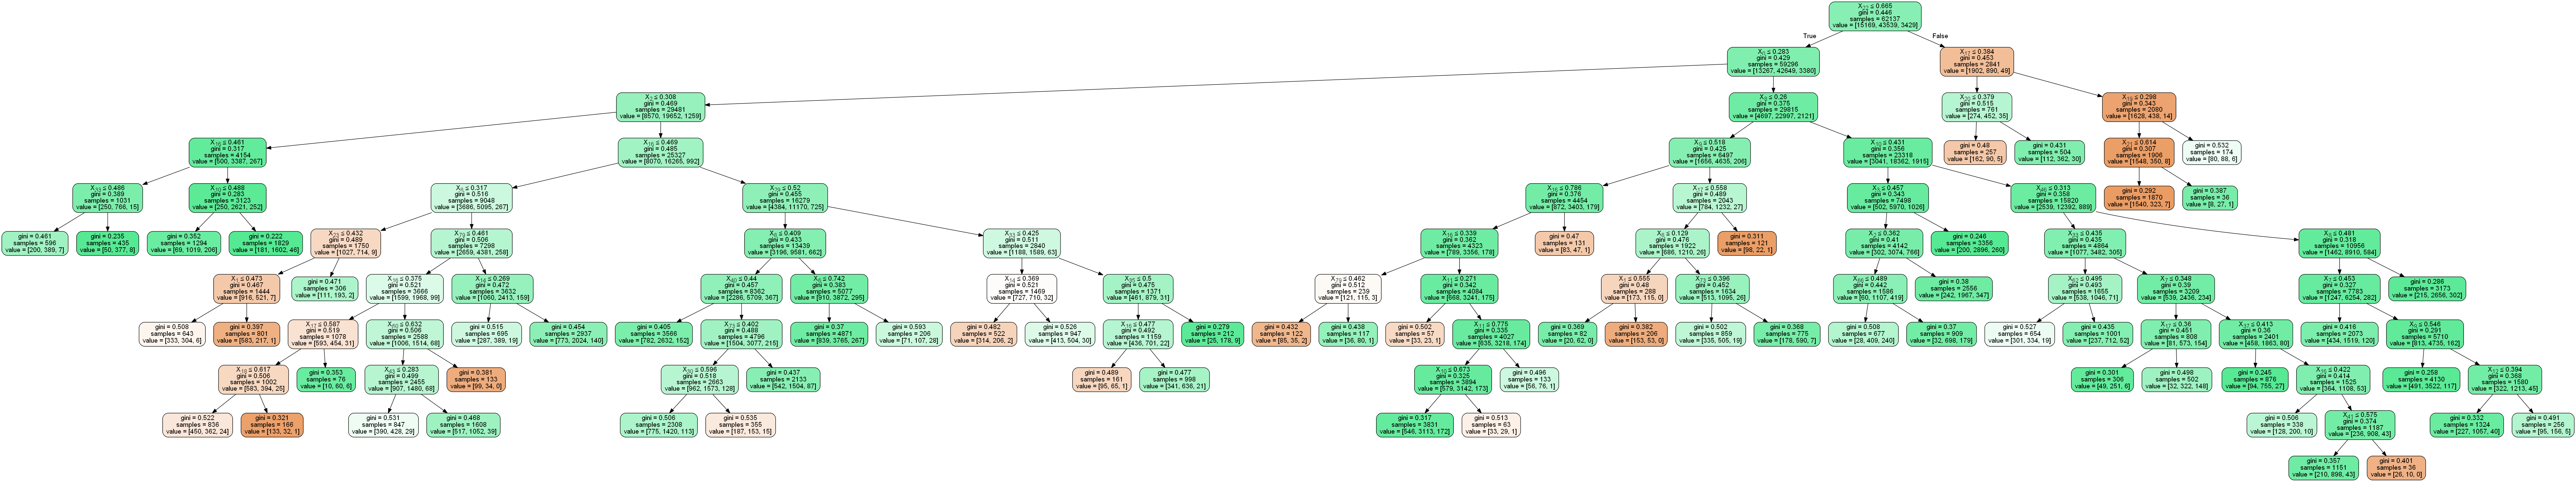

In [48]:
# optimal decision tree
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt_best_model, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Issues:
- Decision Tree with default params shows weak results with 0.64 accuracy score
- Using grid search with various params improved results to 0.73 score, which is close to best KNN model
- Small difference between train and validation subsets indicates that there is no overfitting

In [49]:
# 6.5. Support Vector Machine

In [50]:
# let's test single rbf and linear svm-models with max_iter limit (100) due to hard-calc-time
# In interim runs I found that max_iter = 100 provides enough quality to the models

svm_nonlinear = SVC(decision_function_shape='ovo', random_state=37, max_iter=100)
svm_linear = LinearSVC(random_state=37, max_iter=100)

svm_nonlinear_default = Single_Model(svm_nonlinear, X_train_pca, y_train, cv=4, param_grid={})
svm_linear_default = Single_Model(svm_linear, X_train_pca, y_train, cv=4, param_grid={})

print('rbf-model')
print(70*'-')
svm_nonlinear_default.show_grid_results()

print('linear-model')
print(70*'-')
svm_linear_default.show_grid_results()

# I also separately tested sigmoid and poly kernels, which provided poor accuracy. 
# On next cell I will run grid_search only on LinearSVM

rbf-model
----------------------------------------------------------------------
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': 100, 'probability': False, 'random_state': 37, 'shrinking': True, 'tol': 0.001, 'verbose': False}
best score: 0.21360863897516777
worst score: 0.21360863897516777
train subsets score range: 0.21346371221644325 - 0.21346371221644325
linear-model
----------------------------------------------------------------------
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 100, 'multi_clas

In [51]:
# attention!: this cell can take time up to 20 minutes!

svm_grid_linear = {
    'penalty': ['l1', 'l2'],
    "tol": [1e-12, 1e-7, 1e-3],
    "C": [1.0, 0.3, 0.1],
    'dual': [False]
    }

svm_gridmodel_linear = Single_Model(svm_linear, X_train_pca, y_train, cv=4, param_grid=svm_grid_linear)
svm_gridmodel_linear.show_grid_results()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 37, 'tol': 1e-12, 'verbose': 0}
best score: 0.7438885044337512
worst score: 0.7425527463508055
train subsets score range: 0.7430838195835643 - 0.744258641260416


In [52]:
svm_best_model = svm_gridmodel_linear.best_model()

Issues:
- SVM gives robust results only with Linear Kernel used
- The best score (0.744) is a little bit better than for KNN and Decision Tree
- At the same time, tuning hyperparams improve the result weakly

In [53]:
# 6.5. Logistic Regression

In [54]:
# default hyper-params

logreg = LogisticRegression(random_state=37, multi_class='auto', n_jobs=-1)
logreg_default = Single_Model(logreg, X_train_pca, y_train, cv=4, param_grid={})
logreg_default.show_grid_results()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 37, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
best score: 0.7454173841672433
worst score: 0.7454173841672433
train subsets score range: 0.7460718380020064 - 0.7460718380020064


comments for hyperparam space for the next cell:
- I tested here all types of solver except liblinear which not good for big datasets
- I fixed multi_class - as auto which is appropriate for multiclass problems
- I noticed, that for all solvers max_iter = 100 is enough to get optimal results
- So, key hyper-params for looping here are: C and tol
- I realized that SAG and SAGA solvers work much faster than other solvers and provide similar results, so in order to reduce re-run time, I showed GridSearch calcs bellow with only for SAGA solver

In [55]:
# tuning hyper-params

# attention!: this cell can take time up to 10m!

logreg_grid = {
    'solver': ['saga'],
    "tol": [1e-2, 1e-4, 1e-8],
    'C': [1, 0.5, 0.1],
    'max_iter': [100],
    }

logreg_gridmodel = Single_Model(logreg, X_train_pca, y_train, cv=4, param_grid=logreg_grid)
logreg_gridmodel.show_grid_results()
logreg_best_model = logreg_gridmodel.best_model()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'C': 0.5, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 37, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
best score: 0.7455944123469108
worst score: 0.7450150473952717
train subsets score range: 0.7456855981541741 - 0.7464795376528285


Issues:
- Logistic Regression gives robust results
- The best score (0.746) is a little bit better than for Decision Tree and SVM
- At the same time this algorithm works much faster than SVM

In [56]:
# 6.6. Naive Bayes Classifier

In [57]:
# models with default hyper-params

mnb = MultinomialNB()
mnb_default = Single_Model(mnb, X_train_pca, y_train, cv=4, param_grid={})

print('Multinomial NB Classifier')
print(70*'-')
mnb_default.show_grid_results()

Multinomial NB Classifier
----------------------------------------------------------------------
average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True}
best score: 0.700693628594879
worst score: 0.700693628594879
train subsets score range: 0.7006936288341205 - 0.7006936288341205


In [58]:
# tuning MNB

mnb_grid = {
    'alpha': [0, 0.5, 1],
    'fit_prior': [True]
}

mnb_gridmodel = Single_Model(mnb, X_train_pca, y_train, cv=4, param_grid=mnb_grid)
mnb_gridmodel.show_grid_results()
mnb_best_model = mnb_gridmodel.best_model()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'alpha': 0, 'class_prior': None, 'fit_prior': True}
best score: 0.700693628594879
worst score: 0.700693628594879
train subsets score range: 0.7006936288341205 - 0.7006936288341205


In [59]:
SM_TIME = time.time()

**Conclusions for Single models results**
- all types of models (KNN, Decision Tree, SVM, LogReg and MNB) in this Stage showed quite similar result with low ability of improving accuracy (except Decision Tree) by tuning hyperparams
- Accuracy Score - is varying from 0.70 to 0.75
- The fastest model - is Logistic Regression with highest score
- The only model with high sensitivity to hyper-parameters is Decision Tree

## Ensemble models tuning

- In this stage I will run the following ensemble methods
  - Random Forest
  - ADA-boost
  - XG-boost

In [60]:
# 7.1. Random Forest tuning

In [61]:
# Random Forest with default params

rf = RandomForestClassifier(random_state=37, n_jobs=-1)
rf_default = Single_Model(rf, X_train_pca, y_train, cv=4, param_grid={})
rf_default.show_grid_results()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': -1, 'oob_score': False, 'random_state': 37, 'verbose': 0, 'warm_start': False}
best score: 0.6970082237636192
worst score: 0.6970082237636192
train subsets score range: 0.9760958224927886 - 0.9760958224927886


In [62]:
# Hyper-params tuning for Random Forest

# attention!: this cell take up to 10 min

rf_grid = {
    'n_estimators': [10, 15], # not too much in order to avoid overfit
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10],
    'min_samples_split': [2, 30, 100]
    }

rf_gridmodel = Single_Model(rf, X_train_pca, y_train, cv=4, param_grid=rf_grid)
rf_gridmodel.show_grid_results()
rf_best_model = rf_gridmodel.best_model()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': -1, 'oob_score': False, 'random_state': 37, 'verbose': 0, 'warm_start': False}
best score: 0.7424079051128957
worst score: 0.7210357757857637
train subsets score range: 0.722580730477991 - 0.770614349248369


Issues:
- Random Forest gives results similar to single models from previous Stage
- Default params shows high level of overfitting, so tuning the model is important here
- Comparing to other models, there is a noticable gap between train and valid subsets (0.77 vs 0.74) which could lead some overfitting

In [63]:
# 7.2. ADA-boost tuning

In [64]:
# let's run ADA-boost with default params

adaboost = AdaBoostClassifier(random_state=37)
adaboost_default = Single_Model(adaboost, X_train_pca, y_train, cv=4, param_grid={})
adaboost_default.show_grid_results()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 37}
best score: 0.7253166390395417
worst score: 0.7253166390395417
train subsets score range: 0.7265504554843429 - 0.7265504554843429


In [65]:
# Hyper-params tuning for ADA-boost

# here, I show optimized param space after some internal runs

# attention!: this cell take up to 40 minutes

adaboost_grid = {
    'n_estimators': [200, 1000],
    'learning_rate': [0.3, 0.1]
    }

adaboost_gridmodel = Single_Model(adaboost, X_train_pca, y_train, cv=4, param_grid=adaboost_grid)
adaboost_gridmodel.show_grid_results()
adaboost_best_model = adaboost_gridmodel.best_model()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.3, 'n_estimators': 1000, 'random_state': 37}
best score: 0.7384167243349373
worst score: 0.7207460933099441
train subsets score range: 0.7208533811213341 - 0.742032389269959


Issues:
- Even the fact, that this model takes much more time for calculations, the results are similar to other models

In [66]:
# 7.3. XG-boost

In [67]:
# default params

xgb = xgboost.XGBClassifier(random_state=37, n_jobs=-1)
xgb_default = Single_Model(xgb, X_train_pca, y_train, cv=4, param_grid={})
xgb_default.show_grid_results()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': -1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 37, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
best score: 0.7433735133656275
worst score: 0.7433735133656275
train subsets score range: 0.7488881966446438 - 0.7488881966446438


In [68]:
# Hyper-params tuning for XG-Boost

# I've chosen here gbtree-booster, since gblinear - gives worst results (~0.70), dart - is too heavy

# attention!: this cell take up to 1 hour

xgb_grid = {
    'booster': ['gbtree'], 
    'n_estimators': [50, 100, 120],
    'learning_rate': [0.1],
    'max_depth': [7, 10],
    'base_score': [0.73]
}

xgb_gridmodel = Single_Model(xgb, X_train_pca, y_train, cv=4, param_grid=xgb_grid)
xgb_gridmodel.show_grid_results()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'base_score': 0.73, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': -1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 37, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
best score: 0.7510179120330882
worst score: 0.744033345671661
train subsets score range: 0.788097260562439 - 0.8940995992845011


- so, we obtained 0.751 - accuracy score, but on train subsets the score is significantly higher (up to 0.89) which could lead some overfitting.  
- Now, let's tune regularization params on the model

In [69]:
# optimal params

# here I fixed to xfb_grid optimal params (only base score was adjusted), 
# which a little bit decreased score on train subsets

xgb_grid = {
    'booster': ['gbtree'], 
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [7],
    'base_score': [0.75],
    'reg_lambda': [1]
}

xgb_gridmodel = Single_Model(xgb, X_train_pca, y_train, cv=4, param_grid=xgb_grid)
xgb_gridmodel.show_grid_results()
xgb_best_model = xgb_gridmodel.best_model()

average results on validations subsets (if not mentioned):
----------------------------------------------------------------------
best params: {'base_score': 0.75, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': -1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 37, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
best score: 0.7510661924457248
worst score: 0.7510661924457248
train subsets score range: 0.8124359594523496 - 0.8124359594523496


**Conclusions for Single models results**

- Random Forest model showed 0.747 accuracy score (and 0.77 - on train subsets) with gini-criterion and 15 estimators
- ADA-boost model showed 0.739 accuracy score (0.74 - on train subsets) with 1000 estimators
- XG-boost model showed 0.752 accuracy score (0.81 - on train subsets) with 100 estimators
- In next Step I will create pipeline sets with all single and ensemble models and will test results on TRAIN set for final choose

In [70]:
EM_TIME = time.time()

## Pipelines

- In this Stage I will run all models with best hyper-params via pipelines and compare results on test datasets (which not used before)


- All models will be fitted again on full Train sets (without internal cross validation)


- Because of the fact, that some model could be overfitted, I will test it with different number of PCA-components:
  - base case - 87 components - 97.5% of Total Variance
  - case 2 - 56 components - 90% of Total Variance
  - case 3 - 36 components - 80% of Total Variance


- In order to understand prediction quality better, I've also added version of f1_score metric with weighted-average mechanism for averaging scores for classes inside

In [71]:
# 8.1. lists preparation

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

fitted_models = [knn_best_model, logreg_best_model, mnb_best_model, dt_best_model, 
                 svm_best_model, rf_best_model, adaboost_best_model, xgb_best_model]

model_classes = [KNeighborsClassifier, LogisticRegression, MultinomialNB, DecisionTreeClassifier, 
                 LinearSVC, RandomForestClassifier, AdaBoostClassifier, xgboost.XGBClassifier]

model_labels = ['knn','logreg','bayes','tree','svm','randomforest', 'ada','xgb']

best_params = [model.get_params() for model in fitted_models] # from grid_search analysis

n_PCA = [87, 56, 36] # 99.7 - 90 - 80% of Variance

In [73]:
# 8.2. Comparison on previous fitted models (without pipelines) on fixed PCA (87)

In [74]:
for model, label in zip(fitted_models, model_labels):
    print(f'{label}: accuracy score on TEST set is {model.score(X_test_pca, y_test)}')

knn: accuracy score on TEST set is 0.7370453813968458
logreg: accuracy score on TEST set is 0.7426456388799485
bayes: accuracy score on TEST set is 0.6965561635017702
tree: accuracy score on TEST set is 0.7270679111683296
svm: accuracy score on TEST set is 0.7387190215642099
randomforest: accuracy score on TEST set is 0.7371097521725137
ada: accuracy score on TEST set is 0.7352429996781461
xgb: accuracy score on TEST set is 0.7496620534277438


In [75]:
# 8.3. Refit models on the whole (X_train, y_train) with finding optimal number of PCA-components

In [76]:
# attention!: this cell can take time up to 40 min (mainly due to ADA-boost and KNN)

for model, label, params in zip(model_classes, model_labels, best_params):
    scores_test = []
    scores_train = []
    weighted_f1_test = []
    
    for idx, n in enumerate(n_PCA):
        pipe = Pipeline([('mms', MinMaxScaler()), 
                         ('pca', PCA(n_components=n)),
                         ('mms2', MinMaxScaler()), # additional mms after PCA
                         (label, model(**params))])
        pipe.fit(X_train, y_train)
        scr_test = pipe.score(X_test, y_test)
        scr_train = pipe.score(X_train, y_train)
        pred = pipe.predict(X_test)
        f1_scr_test = f1_score(y_test, pred, average='weighted')
        
        scores_test.append(scr_test)
        scores_train.append(scr_train)
        weighted_f1_test.append(f1_scr_test)
        
        if scr_test == max(scores_test):
            best_n = n
            best_idx = idx
            
    print(f'{label}:')
    print(70*'.')
    print(f'best n_PCA = {best_n} with accuracy score = {scores_test[best_idx]} on test set')
    print(f'weighted f1-score on test set = {weighted_f1_test[best_idx]}')
    print(f'accuracy score on train set = {scores_train[best_idx]}')
    print(70*'-')

knn:
......................................................................
best n_PCA = 56 with accuracy score = 0.7378822014805279 on test set
weighted f1-score on test set = 0.6877998789177033
accuracy score on train set = 0.7462542446529443
----------------------------------------------------------------------
logreg:
......................................................................
best n_PCA = 87 with accuracy score = 0.7427100096556164 on test set
weighted f1-score on test set = 0.696948957389886
accuracy score on train set = 0.7465117401870062
----------------------------------------------------------------------
bayes:
......................................................................
best n_PCA = 36 with accuracy score = 0.6965561635017702 on test set
weighted f1-score on test set = 0.5719710309039805
accuracy score on train set = 0.700693628594879
----------------------------------------------------------------------
tree:
...........................................

Issues:
- best estimator is xg-boost with accuracy score = 0.75 on 87 PCA
- however, other classifiers' metrics are not far from it and vary from 0.70 (bayes) to 0.743 (log.regression)
- using weighted f1-score instead of accuracy score doesn't change ordered sequence of models
- almost all models except RandomForest and XGBoost - are strongly balanced in terms of difference between train and test scores (difference close to zero)
- let's look deeply on top2 best models: xgb and log-reg, and looks on their confusion matrices

In [77]:
# 8.4. Confusion matrices for XG-boost and LogReg

In [78]:
# Initializing and saving LogReg and XG-boost models
# attention!: this cell can take time up to 10 min

logreg_model = Pipeline([('mms', MinMaxScaler()), 
                         ('pca', PCA(n_components=87)),
                         ('mms2', MinMaxScaler()),
                         ('logreg', LogisticRegression(**best_params[1]))])

logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

xgb_model = Pipeline([('mms', MinMaxScaler()), 
                         ('pca', PCA(n_components=87)),
                         ('mms2', MinMaxScaler()),
                         ('logreg', xgboost.XGBClassifier(**best_params[-1]))])

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [79]:
# function for showing confusion matrix as matrix-plot
import itertools

def plot_confusion_matrix(pred, y_test, model_name, ax=None):
    """
    plot confusion matrix in heatmap style on y_predict and y_true base
    """
    cnf_matrix = confusion_matrix(pred, y_test)
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix on {model_name}')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    class_names = set(y_test)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.colorbar()
    plt.show()

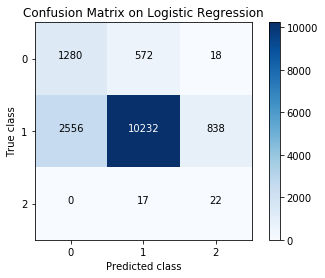

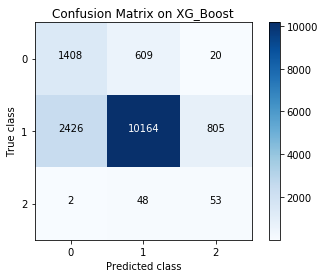

In [80]:
# confusion matrices
plot_confusion_matrix(logreg_pred, y_test,'Logistic Regression')
plot_confusion_matrix(xgb_pred, y_test,'XG_Boost')

Issues:
- looking to the plots above, it can be noticed that XG_boost working more carefull for minor classes (0 and 2), while for the major class (1) it shows weaker prediction accuracy

In [81]:
PP_TIME = time.time()

## Monte-Carlo simulations

- In this Stage I will simulate predictions on chosen XG-boost model and show accuracy distribution.  


- To do that, I've made scratch-version of bootstrap-type multi-simulation function `forecast_simulations`, which randomly set length (`n`) of single test set, repeat it (`iter-number`)-times with different random_state and create kde-plot on accuracy array


- One of the option of this function is to take sample not only from X_test, but from the whole initial dataset before split (`sample_from_test_only=False`)

In [82]:
# 9.1. Monte-Carlo function

In [83]:
def forecast_simulations(fitted_model, X, y, n, iter_number,
                          sample_from_test_only=True):
    """
    plot KDE and Histogram for given model:
    X - original feature matrix before split,
    y - original target array before split,
    n - number of sample in one iteration to predict;
    iter_number - number of Monte-Carlo iterations;
    sample_from_test_only - if False, samples from X and y be taken
    """
    if sample_from_test_only:
        X_source, y_source = X_test, y_test
    else:
        X_source, y_source = X, y
    
    total_accuracy = []
    for i in range(iter_number):
        np.random.random_state = np.random.randint(10000)
        index_to_test = np.random.randint(0, len(y_source), n)
        pred = fitted_model.predict(X_source.iloc[index_to_test])
        y_true = y_source.iloc[index_to_test]
        accur = sum([1 if i==j else 0 for i,j in zip(y_true.values, pred)])/n
        total_accuracy.append(accur)
    total_accuracy = np.array(total_accuracy)
    sns.distplot(total_accuracy)
    plt.title(f'avg accuracy ={round(total_accuracy.mean(),2)}+/-{round(total_accuracy.std(),2)}\nsample size={n},\nnumber of iteration={iter_number}')
    plt.show()

In [84]:
# 9.2. Forecast simulations - on TEST data only

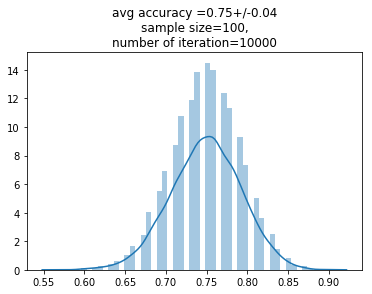

In [85]:
forecast_simulations(xgb_model, X,y, n=100,iter_number=10000, sample_from_test_only=True)

In [86]:
# 9.3. Forecast simulations - on TEST and TRAIN data only

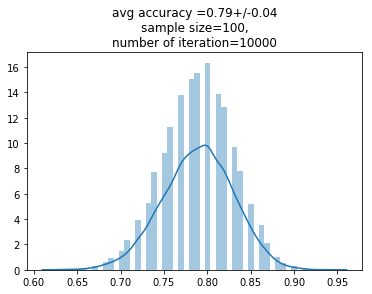

In [87]:
forecast_simulations(xgb_model, X,y, n=100,iter_number=10000, sample_from_test_only=False)

Issues:
- as expected, prediction power on overal dataset is a little bit higher (~79%) than on test dataset (~75%)
- Monte-Carlo simulations results showed average accuracy close to the one calculated in pipeline Stage

In [88]:
MC_TIME = time.time()

TOTAL_TIME = 0
STAGES = [DC_TIME, EDA_TIME, PCA_TIME, CLUSTER_TIME, SM_TIME, EM_TIME, PP_TIME, MC_TIME]
STAGE_LABELS = ['Data Scrubbing', 'EDA', 'PCA','Clustering','GridSearch on Single Models',
               'Grid Search on Ensemles', 'Pipelines Comparison', 'Monte-Carlo simulations']
START = START
for stage_time, stage_label in zip(STAGES, STAGE_LABELS):
    delta_time = round(((stage_time - START)/60),1)
    TOTAL_TIME += delta_time
    START = stage_time
    print(f'{stage_label}: {delta_time} min')
    print(40*'.')
print(40*'_')
print(f'TOTAL TIME is {TOTAL_TIME} min')

Data Scrubbing: 0.1 min
........................................
EDA: 5.7 min
........................................
PCA: 0.1 min
........................................
Clustering: 22.9 min
........................................
GridSearch on Single Models: 48.1 min
........................................
Grid Search on Ensemles: 97.5 min
........................................
Pipelines Comparison: 28.1 min
........................................
Monte-Carlo simulations: 0.7 min
........................................
________________________________________
TOTAL TIME is 203.2 min


## Conclusions

- Initial Dataset contains 3-class target with medium level of imbalance and highly sparsed predictors


- Original 160 predictors can be efficiently reduced up to 87 predictors by saving 97% of information


- Cluster analysis (KNN+ and DBSCAN) didn't reveal clear clusters in the predictors dataset


- The dataset was tested by almost all general ml-algorithms and ensemble methods


- Within those XG-boost and Logistic Regression were showed most robust results in cross-validated subsets and test sets with average accuracy 0.75


- XG-boost model is chosen as best model


- However, other algorytmns were close to these two in terms of prediction quality with accuracy range from 0.7 to 0.74


- Monte-Carlo simulation showed that average accuracy (0.75) for XG-boost-model


- Obtained accuracy result (0.75) is demonstrate moderate overall power, comparing to initial major class weight (0.7), it means that some improvements should be done in future work

## Business recommendations

- Developed model provides an ability to predict pricing segment depending on various factors, including:
  - rating
  - ranking
  - number of reviews
  - city
  - cuisine types
  
  
- Understanding how price segments for restaurants in EU cities could be predicted provides to Investor a good tool for understanding business envorinment and competition structure


- General question which could be answered by model is what type of cuisine and what city are correspond to cheap, medium and luxury restaurants and this information can help to develop quialified business plan or make effective benchmark to considered acquisition project

## Future Work

- In order to improve model prediction power, the following work is needed:
  - Adding new information (e.g. fill NANS)
  - Adding NLP analysis on Reviews column
  - Trying Deep Learning models
  - Expand marketing research by making a model with Rating as a target

## Addendum: city maps